In [1]:
#imports for all imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import zscore

#options

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('chained_assignment',None)

In [2]:
#read in data
train = pd.read_csv('./datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
def df(dataset):
    #remove columns with more than 90% of null values.
    train_data = dataset.loc[:, dataset.isin([np.nan]).mean() < .90]
    
    #fill in null values for columns with missing data that I want to keep
    train_data.fillna({'Fireplace Qu': 'NA', 'Fence': 'NA', 'Lot Frontage': 0}, inplace = True)
    
    #remaping ordinal columns to numerical values
    train_data['Exter Qual'] = train_data['Exter Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    train_data['Exter Cond'] = train_data['Exter Cond'].map({'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1})
    train_data['Bsmt Qual']= train_data['Bsmt Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA': 0})
    train_data['Bsmt Cond'] = train_data['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1, 'NA': 0})
    train_data['Bsmt Exposure'] = train_data['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No':1, 'NA': 0})
    train_data['BsmtFin Type 1'] = train_data['BsmtFin Type 1'].map({'GLQ': 6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
    train_data['BsmtFin Type 2'] = train_data['BsmtFin Type 2'].map({'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
    train_data['Heating QC'] = train_data['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
    train_data['Electrical'] = train_data['Electrical'].map({'SBrkr':4, 'FuseA':3, "FuseF":2, 'FuseP':1, 'Mix':0})
    train_data['Kitchen Qual']= train_data['Kitchen Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    train_data['Functional']= train_data['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0 })
    train_data['Fireplace Qu'] = train_data['Fireplace Qu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    train_data['Garage Finish'] = train_data['Garage Finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0 })
    train_data['Garage Qual'] = train_data['Garage Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    train_data['Garage Cond']= train_data['Garage Cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
    train_data['Paved Drive']= train_data['Paved Drive'].map({'Y':3, 'P':2, 'N':1})
    train_data['Fence']= train_data['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0})
    
    #dummify left over categorical data columns
    train_data = pd.get_dummies(data = train_data, columns = list(train_data.select_dtypes(['object']).columns), drop_first=True)
    
    #drop rest of null values less than 90%
    train_data.dropna(inplace=True)
    
    return train_data
    

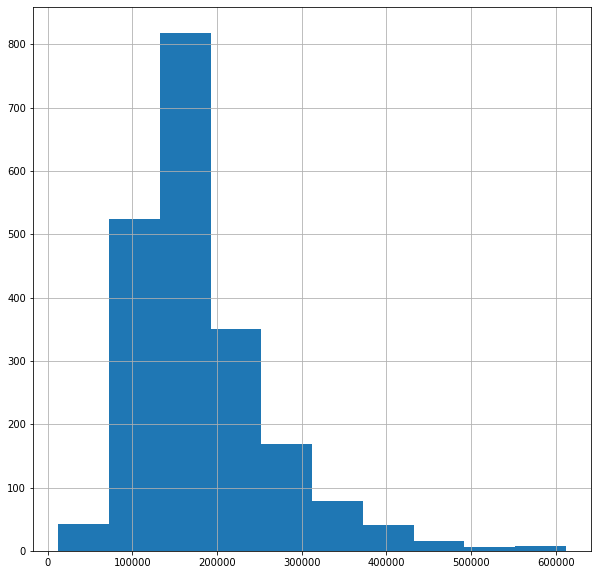

In [81]:
train.SalePrice.hist(figsize=(10,10));

In [5]:
train_data = df(train)
train_data.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,4,3,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,5,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,1976.0,2.0,2.0,475.0,3.0,3.0,3,0,44,0,0,0,0,0,0,3,2010,130500,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,4,3,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,5,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,1997.0,2.0,2.0,559.0,3.0,3.0,3,0,74,0,0,0,0,0,0,4,2009,220000,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [6]:
train_data.shape

(1866, 194)

# Baseline Model Score:
I've decided to keep all columns and see what baseline results our models give. From there, I will adjust as necessary

In [7]:
#train test split
X = train_data.drop(columns = ['SalePrice', 'Id', 'PID'])
y = train_data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

In [8]:
#instantiate regression models 
lr = LinearRegression()
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

#instantiate standard scaler for lasso and ridge models
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [9]:
#fit models
lr.fit(X_train,y_train)
lasso.fit(Z_train,y_train)
ridge.fit(Z_train, y_train)

/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3518117887.9901123, tolerance: 776943052.9372201
  positive)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
#linear regression
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9244793087471566
0.7614081107519789


In [11]:
#Lasso
print(lasso.score(Z_train, y_train))
print(lasso.score(Z_test, y_test))

0.9244786617827763
0.7642247034683121


In [12]:
print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))

0.9244719609199722
0.7654118576148279


In [13]:
#since our Linear regression model has the highest training score, we will use that for our predictions
pred = lr.predict(X)

#error terms
print('MAE:', metrics.mean_absolute_error(y, pred))         
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, pred)))

MAE: 16409.607154026828
RMSE: 28206.976410319443


### Now with our baseline results set, let's see if we can do a little better by scaling our Sale Price

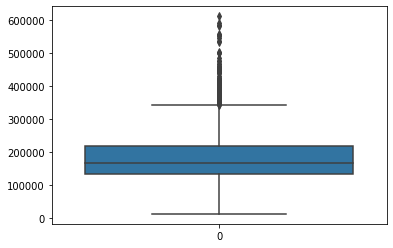

In [14]:
#checking for outliers in Sale Price

sns.boxplot(data=train_data['SalePrice']);

## Dealing with Outliers

- As we can see from the box plot, some homes above the price range of $350,000 are considered outliers. 
- This drives causes our mean to be much higher than the median, thereby causing our data to have a right skewed distribution
- As a way to combat this, we will find z scores of each of our price columns and remove rows where the z score is over or under 3 standard deviations

In [15]:
#standardizing our data to get rid of outliers in our target variable
train_data['Z_score'] = zscore(train_data.SalePrice)
train_data.drop(train_data[(train_data.Z_score > 3.0)| (train_data.Z_score < -3.0)].index,inplace=True)

In [16]:
train_data.shape

(1835, 195)

## Calculating new accuracy scores.

- I will use the new data without the outliers and see if I can get a better result, with all else remaining constant.

In [17]:
#new train-test-split

x = train_data.drop(columns = ['Id', 'PID', 'SalePrice', 'Z_score'])
y_ = train_data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(x, y_, test_size = .30, random_state = 42)

In [19]:
#instantiate new regression models

new_lr = LinearRegression()
new_lasso = Lasso()
new_ridge = Ridge()

#Standard scale lasso and ridge models
scr = StandardScaler()
B_train = scr.fit_transform(X_train)
B_test = scr.transform(X_test)

In [20]:
#fit to train models
new_lr.fit(X_train, y_train)
new_lasso.fit(B_train, y_train)
new_ridge.fit(B_train, y_train)

/Users/macbookair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36726808641.04611, tolerance: 579373845.5935969
  positive)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
#score models
#Linear Regression
print(f'The new Linear Regression training score is {(new_lr.score(X_train, y_train))}')
print(f'The new Linear Regression testing score is {new_lr.score(X_test, y_test)}')

#Lasso Regression
print(f'The new Lasso Regression training score is {new_lasso.score(B_train, y_train)}')
print(f'The new Lasso Regression testing score is {new_lasso.score(B_test, y_test)}')

#ridge Regression
print(f'The new Ridge Regression training score is {new_ridge.score(B_train, y_train)}')
print(f'The new Ridge Regression testing score is {new_ridge.score(B_test, y_test)}')

The new Linear Regression training score is 0.9210169464168343
The new Linear Regression testing score is 0.8871224434484274
The new Lasso Regression training score is 0.9210128569000401
The new Lasso Regression testing score is 0.886960828167946
The new Ridge Regression training score is 0.9209364078224536
The new Ridge Regression testing score is 0.88742541400992


In [46]:
predictions = new_lr.predict(x)

#error terms
print('MAE:', metrics.mean_absolute_error(y_, predictions))         
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_, predictions)))

MAE: 13999.495895586624
RMSE: 20386.958851063773


## Final Results
- We see an increase in our testing scores with Ridge Regression having the highest score of 88.74%! This is a huge improvement from our baseline scores
- There's also an improvement in our error terms. Our mean absolute error is down to \\$13,999 
meaning that this is the median price our predicted prices are off by when compared to actual price.
- The Root Mean squared error also shows a signigicant decline. This means that on average, our predicted price is off or over by $20,386
- I will now test this model on unseen data available, courtesy of our test data set.

In [38]:
#read in test data and run function above
test = pd.read_csv('./datasets/test.csv')
test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [39]:
test_data = df(test)

test_data.shape


(811, 184)

In [40]:
# #since train and test columns are uneven, I created columns in the test data to equal the train data by filling in columns with 0. 
# #I also dropped columns in the test data that are not in train data. I'll proceed to drop the Sale Price and id columns for the modeling section 

for column in train_data.columns:
    if column not in test_data.columns:
        test_data[column] = 0

for column in test_data.columns:
    if column not in train_data.columns:
        test_data.drop([column], axis=1, inplace=True)

In [49]:
test_data.shape

(811, 195)

In [42]:
train_data.shape

(1835, 195)

In [47]:
#dropping non needed columns
test_pred = test_data.drop(columns=['SalePrice', 'Id', 'PID', 'Z_score'])

In [57]:
#add in new saleprice column from the predicted price

test_data.drop(columns=['SalePrice', 'Z_score'], inplace = True)

test_data['SalePrice'] = new_lr.predict(test_pred)

## Now which features contribute the most to price?
- We can use our lasso regression to figure out which features contribute the most to price

In [79]:
#create a dataframe with the columns and the coefficients using Lasso regression
coefficents = pd.DataFrame({'Columns': x.columns, 'coefs': new_lasso.coef_})
coefficents.sort_values(by = 'coefs', ascending = False).head()

,Columns,coefs
132,Roof Matl_CompShg,52878.802709
134,Roof Matl_Tar&Grv,39859.125926
136,Roof Matl_WdShngl,22590.383236
135,Roof Matl_WdShake,22585.116463
22,2nd Flr SF,17554.064505
